<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from statsmodels.nonparametric.smoothers_lowess import lowess

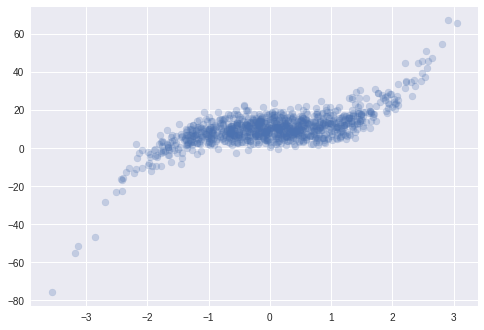

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
plt.style.use("seaborn")

import numpy as np
np.random.seed(8)
X = np.random.randn(1000,1)
Y = 2*(X**3) + 10 + 4.6*np.random.randn(1000,1)
plt.scatter(X, Y, alpha=0.25)
plt.show()

In [49]:
# Weight Matrix in code. It is a diagonal matrix.
def weightmatrix(point, X, tau): 
    
  # tau   --> bandwidth
  # X     --> Training data.
  # point --> the x where we want to make the prediction.
    
  # m is the No of training examples .
    m = X.shape[0] 
    
  # Initialising W as an identity matrix.
    weight = np.mat(np.eye(m)) 
    
  # Calculating weights for all training examples [x(i)'s].
    for i in range(m): 
        xi = X[i] 
        d = (-2 * tau * tau) 
        weight[i, i] = np.exp(np.dot((xi-point), (xi-point).T)/d) 
        
    return weight

In [50]:
def predict(X, y, point, tau): 
    
   # m = number of training examples. 
    m = X.shape[0] 
    
   # Appending a cloumn of ones in X to add the bias term.
   ###  Just one parameter: theta, that's why adding a column of ones        
   #### to X and also adding a 1 for the point where we want to          
   #### predict. 
    X_ = np.append(X, np.ones(m).reshape(m,1), axis=1) 
    
   # point is the x where we want to make the prediction. 
    point_ = np.array([point, 1]) 
    
   # Calculating the weight matrix using the weight matrix function we wrote      #  # earlier. 
    weight = weightmatrix(point_, X_, tau) 
    
  # Calculating parameter theta using the formula.
    theta = np.linalg.pinv(X_.T*(weight * X_))*(X_.T*(weight * y)) 
    
  # Calculating predictions.  
    pred = np.dot(point_, theta) 
    
   # Returning the theta and predictions 
    return theta, pred

In [51]:
def plot_predictions(X, y, tau, nval):
   # X --> Training data. 
   # y --> Output sequence.
   # nval --> number of values/points for which we are going to
   # predict.
   # tau --> the bandwidth.     
    # The values for which we are going to predict.
   # X_test includes nval evenly spaced values in the domain of X.
    X_test = np.linspace(-3, 3, nval) 
    
   # Empty list for storing predictions. 
    preds = [] 
    
   # Predicting for all nval values and storing them in preds. 
    for point in X_test: 
        theta, pred = predict(X, y, point, tau) 
        preds.append(pred)
        
   # Reshaping X_test and preds
    X_test = np.array(X_test).reshape(nval,1)
    preds = np.array(preds).reshape(nval,1)
    
   # Plotting 
    plt.plot(X, y, 'b.')
    plt.plot(X_test, preds, 'r.') # Predictions in red color.
    plt.show()

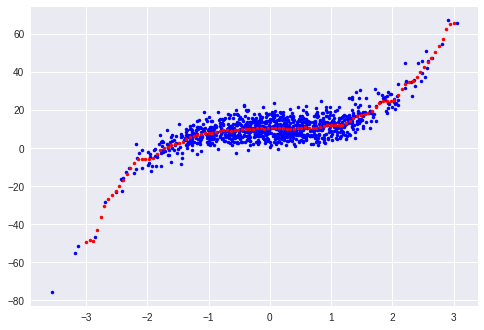

In [52]:
plot_predictions(X, Y, 0.08, 100)

* [tips-locally-weighted-linear-regression](https://www.kaggle.com/alincijov/tips-locally-weighted-linear-regression)
* [Locally weighted linear Regression using Python](https://www.geeksforgeeks.org/locally-weighted-linear-regression-using-python/)*   
* [LOESS Smoothing data using local regression](https://towardsdatascience.com/loess-373d43b03564)
*  [LOWESS Smoother, STATSMODELS](https://www.statsmodels.org/dev/examples/notebooks/generated/lowess.html)
*   https://www.allendowney.com/blog/2019/04/01/local-regression-in-python/
*   https://www.geeksforgeeks.org/implementation-of-locally-weighted-linear-regression/
*   https://towardsdatascience.com/locally-weighted-linear-regression-in-python-3d324108efbf

El mejor ajuste de un modelo de regresión local siempre será el de punto por punto, con un modelo por punto.
Puede que el número de intervalos de corte o en este caso puntos query estén definidos.
Puede que además que se incluya el tamaño del vecindario de los intervalos.
En este caso estos son parámetros del modelo, sin embargo si estas son variables de decisión, el modelo se vuelve un problema de optimal binning, y es aplicado a discretización.
En cierto sentido, k es la perilla de sesgo frente a varianza. Los valores grandes de k darán como resultado un mayor sesgo y los valores más bajos inducirán una mayor varianza.


Ahora que tenemos x’, debemos encontrar sus k vecinos más cercanos usando una distancia euclidiana simple. Llamemos al conjunto ordenado resultante D.

Para cada uno de los datos, seleccionaremos una vecindad adecuada de puntos muestreados y los usaremos como conjunto de entrenamiento para un problema de regresión lineal.

Calcularemos los pesos de los puntos utilizando una función de peso especializada que asigna importancia a cada uno de los k vecinos de x según su distancia a x’

In [55]:
#https://www.geeksforgeeks.org/locally-weighted-linear-regression-using-python/
import numpy as np
from ipywidgets import interact
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
%matplotlib inline
output_notebook()
plt.style.use('seaborn-dark')
 
# function to perform locally weighted linear regression
def local_weighted_regression(x0, X, Y, tau):
    # add bias term
    x0 = np.r_[1, x0]
    X = np.c_[np.ones(len(X)), X]
     
    # fit model: normal equations with kernel
    xw = X.T * weights_calculate(x0, X, tau)
    theta = np.linalg.pinv(xw @ X) @ xw @ Y
    # "@" is used to
    # predict value
    return x0 @ theta
 
# function to perform weight calculation
def weights_calculate(x0, X, tau):
    return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * (tau **2) ))
 
# plot locally weighted regression for different bandwidth values
def plot_lwr(tau):
    # prediction
    domain = np.linspace(-3, 3, num=300)
    prediction = [local_regression(x0, X, Y, tau) for x0 in domain]
 
    plot = figure(plot_width=400, plot_height=400)
    plot.title.text = 'tau=%g' % tau
    plot.scatter(X, Y, alpha=.3)
    plot.line(domain, prediction, line_width=2, color='red')
     
    return plot
 
#define distribution
n = 1000
 
# generate dataset
X = np.linspace(-3, 3, num=n)
Y = np.abs(X ** 3 - 1)
 
# jitter X
X += np.random.normal(scale=.1, size=n)
 
# show the plots for different values of Tau
show(gridplot([
    [plot_lwr(10.), plot_lwr(1.)],
    [plot_lwr(0.1), plot_lwr(0.01)]
]))

NameError: ignored

In [54]:
#https://www.codespeedy.com/locally-weighted-linear-regression-in-python/
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# kernel smoothing function
def kernel(point, xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    
    for j in range(m):
        diff = point - X[j]
        weights[j, j] = np.exp(diff * diff.T / (-2.0 * k**2))
    
    return weights
# function to return local weight of eah traiining example
def localWeight(point, xmat, ymat, k):
    wt = kernel(point, xmat, k)
    W = (X.T * (wt*X)).I * (X.T * wt * ymat.T)
    return W
# root function that drives the algorithm
def localWeightRegression(xmat, ymat, k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    
    for i in range(m):
        ypred[i] = xmat[i] * localWeight(xmat[i], xmat, ymat, k)
        
    return ypred
#import data
data = pd.read_csv('tips.csv')
# place them in suitable data types
colA = np.array(data.total_bill)
colB = np.array(data.tip)
mcolA = np.mat(colA)
mcolB = np.mat(colB)
m = np.shape(mcolB)[1]
one = np.ones((1, m), dtype = int)
# horizontal stacking
X = np.hstack((one.T, mcolA.T))
print(X.shape)
# predicting values using LWLR
ypred = localWeightRegression(X, mcolB, 0.8)
# plotting the predicted graph
xsort = X.copy()
xsort.sort(axis=0)
plt.scatter(colA, colB, color='blue')
plt.plot(xsort[:, 1], ypred[X[:, 1].argsort(0)], color='yellow', linewidth=5)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

FileNotFoundError: ignored

In [57]:
import numpy as np
import pandas as pd
import operator
from os import listdir
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import *
from scipy.stats.stats import pearsonr
df = pd.read_csv('tips.csv')
features = np.array(df.total_bill)
labels = np.array(df.tip)
m = features.shape[0]
mtip = np.mat(labels)
data = np.hstack((np.ones((m, 1)), np.mat(features).T))

In [58]:
def kernel(data, point, xmat, k):
    m,n = np.shape(xmat)
    ws = np.mat(np.eye((m)))
    for j in range(m):
        diff = point - data[j]
        ws[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return ws
 
def local_weight(data, point, xmat, ymat, k):
    wei = kernel(data, point, xmat, k)
    return (data.T*(wei*data)).I*(data.T*(wei*ymat.T))
     
def local_weight_regression(xmat, ymat, k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*local_weight(xmat, xmat[i],xmat,ymat,k)
    return ypred

In [59]:
ypred = local_weight_regression(data, mtip, 0.5)
indices = data[:,1].argsort(0)
xsort = data[indices][:,0]

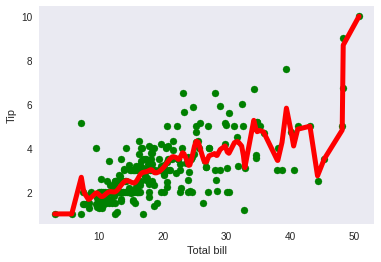

In [60]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(features, labels, color='green')
ax.plot(xsort[:,1],ypred[indices], color = 'red', linewidth=5)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show();